In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
Consumer_Key = "ee71LNIhBorkkXStapMD8Xf8a"
Consumer_Secret_Key = "CtimpCO2188bPm8Dx6j5eK43AbWJPnX8BJlIwO6irNJt1w2lmB"
Access_Token = "711763537971044353-ydboIEZFp6rvi7tT8Iqzx0odvr15ygt"
Access_Token_Secret = "YT5tehyL7rNqge2H992GAMHNEfWCcVBjf3J8UjrHq7SrC"

In [5]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [8]:
posts = api.user_timeline(screen_name="detikcom", count = 1000, lang ="en", tweet_mode="extended")
#  Print the last 5 tweets
print("Show the 200 recent tweets:\n") 
i=1
for tweet in posts[:200]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 200 recent tweets:

1) Mantan Kades Trobayan, Kecamatan Kalijambe, Suparmi dan suaminya Suyadi divonis 2 tahun penjara terkait kasus suap seleksi perangkat desa. Keduanya terbukti menerima suap setengah miliar lebih untuk meloloskan seleksi perangkat desa. https://t.co/E0Zfv5wgCy

2) BNN Maluku bersama tim gabungan menggagalkan penyelundupan narkoba jenis sabu di Bandara Pattimura, Ambon. Hasilnya, 3 orang ditangkap. #Ambon #Narkoba https://t.co/0EY1GedJrR

3) #FOTO Meski berbeda keyakinan, para selebriti ini tetap hidup rukun dengan adik atau kakaknya. Berikut potret keharmonisan keluarga mereka:

via @wolipop https://t.co/y9bwSKVWJc

4) Gubenur DKI Jakarta Anies Baswedan dan Wakil Ketua Komite Penanganan COVID-19 dan PEN Luhut Binsar Pandjaitan teleponan soal libur Nataru di DKI. Apa isinya? #Natal #TahunBaru https://t.co/BCBi3Xvtbl

5) Gatot Nurmantyo meminta sebutan kadrun dan kampret dihentikan. Dua istilah itu berasal dari era persaingan Pilpres 2019 yang mempertemukan J

In [9]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"Mantan Kades Trobayan, Kecamatan Kalijambe, Su..."
1,BNN Maluku bersama tim gabungan menggagalkan p...
2,"#FOTO Meski berbeda keyakinan, para selebriti ..."
3,Gubenur DKI Jakarta Anies Baswedan dan Wakil K...
4,Gatot Nurmantyo meminta sebutan kadrun dan kam...


In [10]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Mantan Kades Trobayan, Kecamatan Kalijambe, Su..."
1,BNN Maluku bersama tim gabungan menggagalkan p...
2,"FOTO Meski berbeda keyakinan, para selebriti i..."
3,Gubenur DKI Jakarta Anies Baswedan dan Wakil K...
4,Gatot Nurmantyo meminta sebutan kadrun dan kam...
...,...
195,Komisioner Komnas HAM Choirul Anam memastikan ...
196,Sebuah statistik mengungkap Karim Benzema suda...
197,"Satreskrim Polresta Mataram, Nusa Tenggara Bar..."
198,"Warga Kelurahan Talun, Kecamatan Sumedang Utar..."


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Mantan Kades Trobayan, Kecamatan Kalijambe, Su...",0.000,0.0000
1,BNN Maluku bersama tim gabungan menggagalkan p...,0.000,0.0000
2,"FOTO Meski berbeda keyakinan, para selebriti i...",0.000,0.0000
3,Gubenur DKI Jakarta Anies Baswedan dan Wakil K...,0.000,0.0000
4,Gatot Nurmantyo meminta sebutan kadrun dan kam...,0.000,0.0000
...,...,...,...
195,Komisioner Komnas HAM Choirul Anam memastikan ...,0.000,0.0000
196,Sebuah statistik mengungkap Karim Benzema suda...,0.300,0.2000
197,"Satreskrim Polresta Mataram, Nusa Tenggara Bar...",0.000,0.0000
198,"Warga Kelurahan Talun, Kecamatan Sumedang Utar...",0.000,0.0000


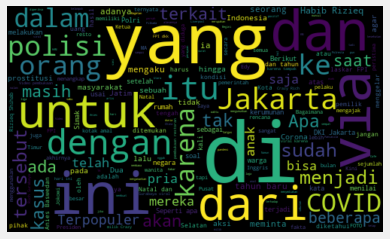

In [12]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Mantan Kades Trobayan, Kecamatan Kalijambe, Su...",0.000,0.0000,Neutral
1,BNN Maluku bersama tim gabungan menggagalkan p...,0.000,0.0000,Neutral
2,"FOTO Meski berbeda keyakinan, para selebriti i...",0.000,0.0000,Neutral
3,Gubenur DKI Jakarta Anies Baswedan dan Wakil K...,0.000,0.0000,Neutral
4,Gatot Nurmantyo meminta sebutan kadrun dan kam...,0.000,0.0000,Neutral
...,...,...,...,...
195,Komisioner Komnas HAM Choirul Anam memastikan ...,0.000,0.0000,Neutral
196,Sebuah statistik mengungkap Karim Benzema suda...,0.300,0.2000,Positive
197,"Satreskrim Polresta Mataram, Nusa Tenggara Bar...",0.000,0.0000,Neutral
198,"Warga Kelurahan Talun, Kecamatan Sumedang Utar...",0.000,0.0000,Neutral


In [14]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Nam Goong Min akan membintangi drama terbaru bertajuk Black Sun. Drama ini menggunakan budget yang sangat tinggi, hingga mencapai Rp 189 miliar. NamGoongMin 

via  

2) Video pembukaan restoran milik Crazy Rich Surabaya viral karena tampak ada kerumunan orang sambil berjoget. Polisi mengusulkan pencabutan izin resto tersebut. 

3) Video pembukaan restoran milik Crazy Rich Surabaya viral karena tampak ada kerumunan orang sambil berjoget. Restoran itu kini ditutup dan karyawan dirumahkan. 

4) Manuel Neuer menyebut Edouard Mendy kiper kelas dunia. Tapi Rob Green, mantan kiper Chelsea, tak sepakat. Penempelan status itu ke Mendy masih kelewat cepat. 

5) Remaja inisial A (17), pelaku mutilasi Dony Saputra (24) di Bekasi diketahui sering bermain game di warnet. A si 'manusia silver' diduga terinspirasi melakukan mutilasi dari game online. Bekasi Mutilasi 

6) Video pembukaan restoran premium milik Crazy Rich Surabaya viral karena tampak terjadi kerumunan. Pemi

In [15]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) Johnny Depp sebelumnya diminta keluar dari perannya dalam Fantastic Beasts. Kini ia tak diperbolehkan kembali sebagai Jack Sparrow oleh Disney. JohnnyDepp 

via  

2) Undian Piala Super Spanyol 2020/21 sudah diumumkan. Ada potensi terciptanya duel El Clasico di babak final. 

3) Menteri PANRB Tjahjo Kumolo mengatakan PNS harus bekerja secara fleksibel di era new normal. Menurutnya, sebisa mungkin PNS tak perlu bekerja di kantor, tapi bisa di mana saja. 

4) Liverpool dini hari tadi menang atas Tottenham Hotspur 2-1. Juergen Klopp pun tetap stay cool menghadapi segala perkataan Jose Mourinho.

liverpool EPL  

5) Turnamen Grand Slam Australia Terbuka 2021 resmi diundur dari jadwal semula. Pandemi COVID-19 menjadi alasannya. 

6) "Alhamdulillah saya sebagai surprised pada saat sidang, hakim menyampaikan bahwa penangguhannya dikabulkan, itu di luar dugaan saya," kata Ruslan. 

7) Sebuah statistik mengungkap Karim Benzema sudah layaknya Cristiano Ronaldo di Re

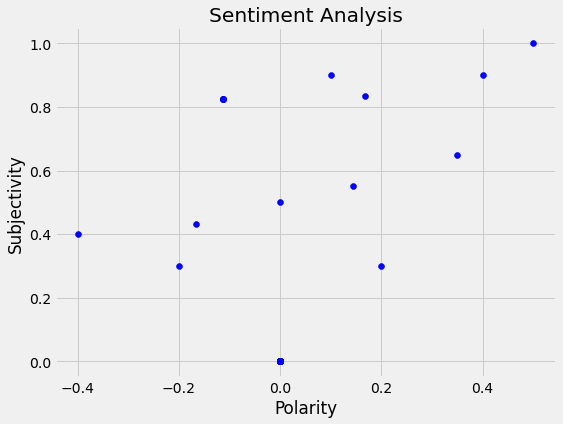

In [16]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [17]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

3.5

In [18]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     185
Negative      8
Positive      7
Name: Analysis, dtype: int64

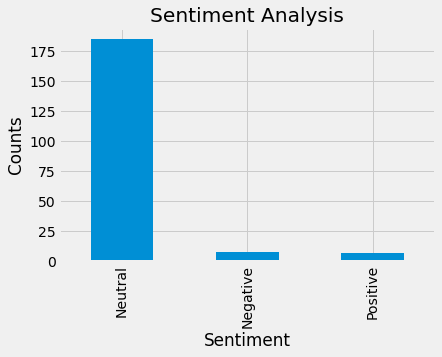

In [19]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

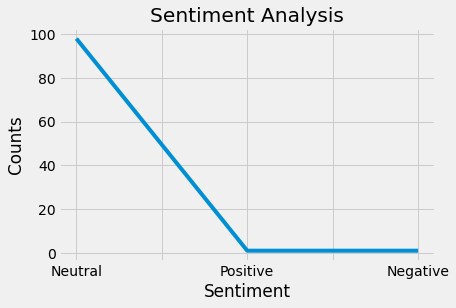

In [54]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()